In [1]:
import numpy as np
import torch
from torch import nn
from torchvision.transforms.functional import center_crop, pad, resize
# Import distributions
from sklearn.datasets import make_moons
from distributions.toysets import chessboard_distribution

# Import model
from models.flow.realnvp import realNVP

import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = realNVP().to(device)

Text(0.5, 1.0, 'Initial distribution')

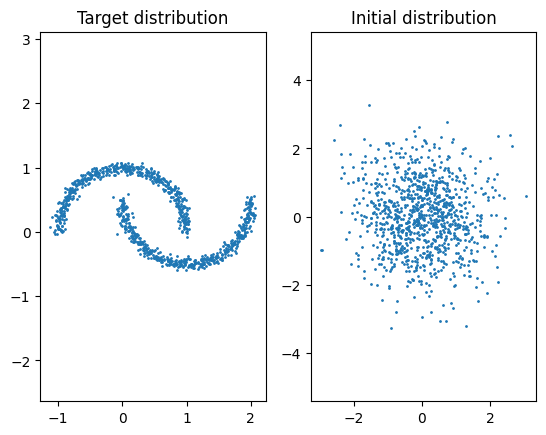

In [3]:
# Choose distribution to be used for training/testing (2D toysets)
x, _ = make_moons(n_samples=1000, noise=0.05)
# x = chessboard_distribution(10000)


x = torch.from_numpy(x).float()
x = x.to(device)

y = torch.randn_like(x)

plt.subplot(1,2,1)
plt.scatter(x[:,0].cpu(), x[:,1].cpu(), s=1)
plt.axis('equal')
plt.title('Target distribution')
plt.subplot(1,2,2)
plt.scatter(y[:,0].cpu(), y[:,1].cpu(), s=1)
plt.axis('equal')
plt.title('Initial distribution')

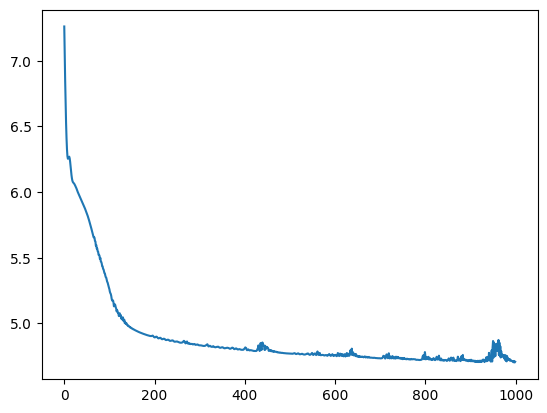

In [4]:
from IPython.display import clear_output

# Train model
# model = RealNVP(2, 256, 3, 8)
# model = model.to(device)

optim = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_hist = []

for i in range(1000):
    optim.zero_grad()
    y_hat, logdet = model(x)
    loss = y_hat.new_tensor([2 * torch.pi]) + torch.mean(torch.sum(0.5*y_hat**2, -1) - logdet)
    loss.backward()
    optim.step()
    
    # Plot results
    loss_hist.append(loss.item())
    clear_output(wait=True)
    plt.plot(loss_hist)
    plt.show()
    # print(loss.item())
    

In [13]:
y_test = torch.randn((2000, 2)).cuda()

x_hat, logdet = model.reverse(y_test)
x_hat = x_hat.detach().cpu()

Text(0.5, 1.0, 'Target distribution')

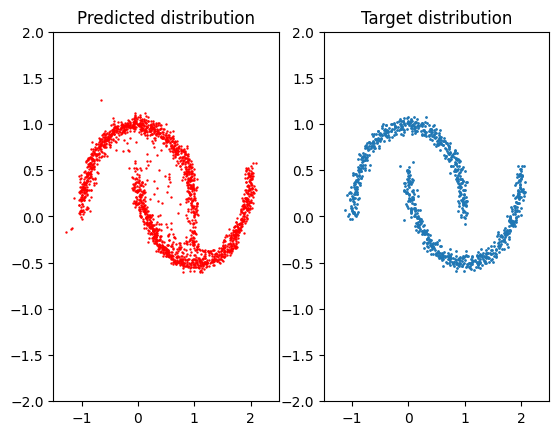

In [30]:
plt.subplot(1, 2, 1)
plt.scatter(x_hat[:, 0], x_hat[:, 1], s=0.5, color='red')
plt.ylim(-2, 2)
plt.xlim(-1.5, 2.5)
# plt.axis('equal')
plt.title('Predicted distribution')

plt.subplot(1, 2, 2)
plt.scatter(x[:,0].cpu(), x[:,1].cpu(), s=1)
plt.ylim(-2, 2)
plt.xlim(-1.5, 2.5)
# plt.axis('equal')
plt.title('Target distribution')